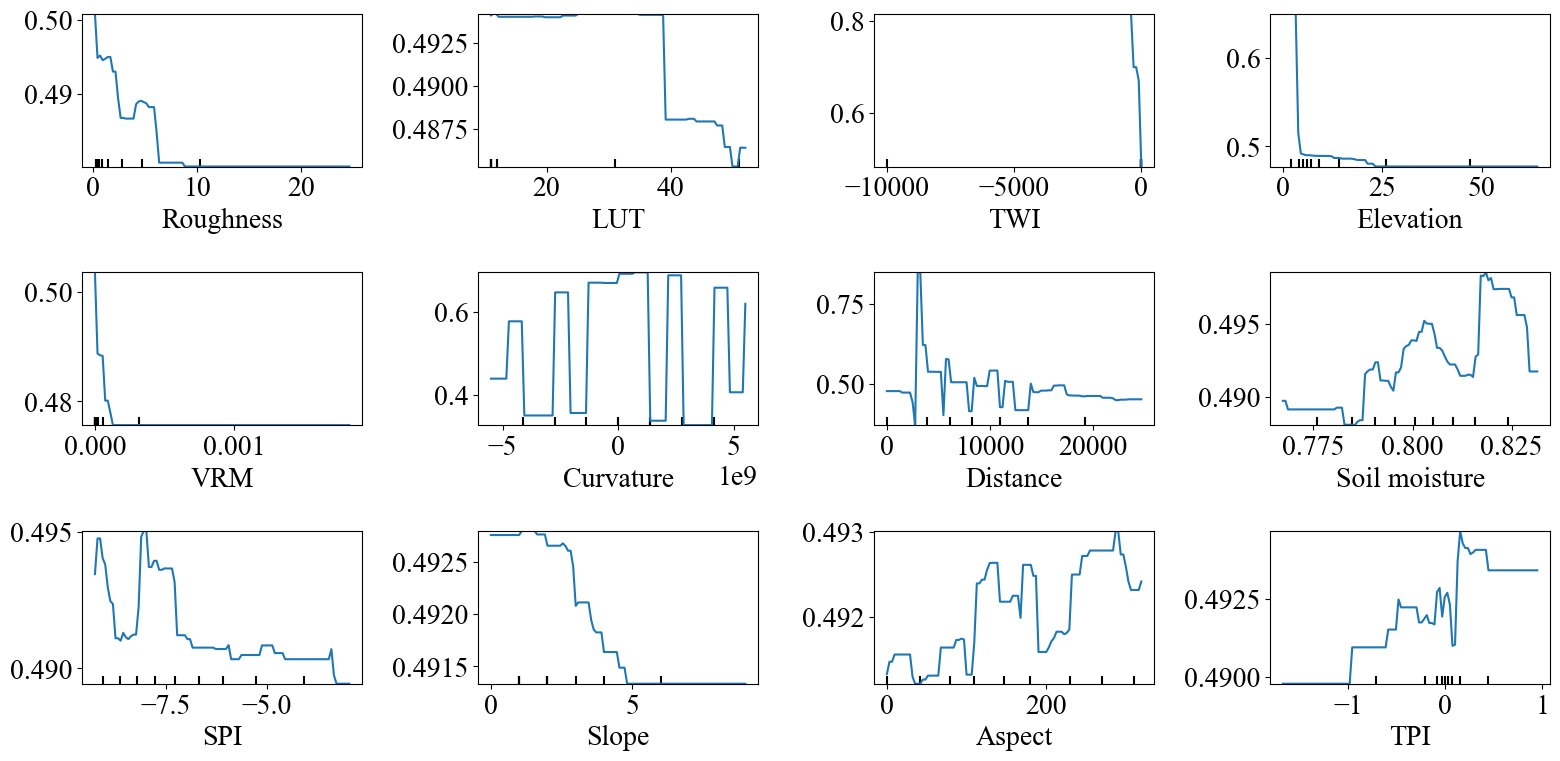

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
import matplotlib.ticker as mtick

# 设置全局字体为 Times New Roman，并增大字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20

# 1. 读取数据
df = pd.read_excel(r"C:\Users\la136\Desktop\OtoO.xlsx", sheet_name='0和1234')

# 2. 设置目标列名
target_column = 'label'
X = df.drop(columns=[target_column])
y = df[target_column]

# 3. 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 训练模型
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)


# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# 5. 获取前12个重要特征
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
top_features = X.columns[sorted_indices[:12]]

# 6. 绘制 PDP 图
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    disp = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features=[feature],
        kind="average",
        grid_resolution=100,
        random_state=42,
        ax=ax
    )
    disp.axes_[0, 0].set_ylabel('')  # 正确移除 y 轴标签
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))

# 移除多余子图
for j in range(len(top_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


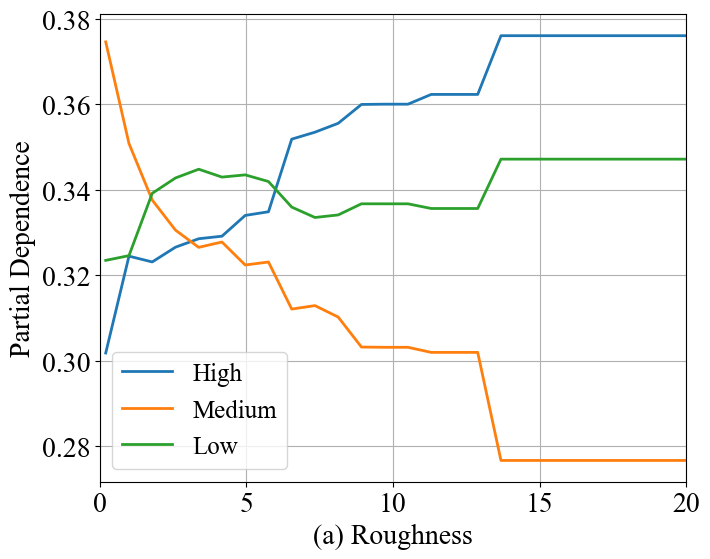

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.ticker as mtick

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'

# 1. 读取数据
df = pd.read_excel(r"C:\Users\la136\Desktop\2重投顺利\数据集\多分类训练.xlsx", sheet_name='三分类均衡')

# 2. 特征和标签
target_column = 'label'
X = df.drop(columns=[target_column])
y = df[target_column]

# 3. 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. 训练模型
num_classes = len(np.unique(y))
model = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)

# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# 5. 类别标签映射
class_labels = {0: 'High', 1: 'Medium', 2: 'Low'}

# 6. 提取 PDP 数据
pdp_results = {}

for class_id in range(num_classes):
    fig, ax = plt.subplots(figsize=(6, 4))

    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features=['Roughness'],
        target=class_id,
        kind="average",
        grid_resolution=100,
        ax=ax
    )

    line = display.lines_[0][0]
    x_vals = line.get_xdata()
    y_vals = line.get_ydata()
    pdp_results[class_id] = (x_vals, y_vals)

    plt.close(fig)

# 7. 统一绘图
plt.figure(figsize=(7.5, 6))
for class_id, (x, y) in pdp_results.items():
    label_name = class_labels.get(class_id, f"Class {class_id}")
    plt.plot(x, y, label=label_name, linewidth=2)

# 设置字体大小
plt.xlabel('(a) Roughness', fontsize=20)
plt.ylabel('Partial Dependence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)
plt.xlim(0, 20)
plt.tight_layout()
plt.show()

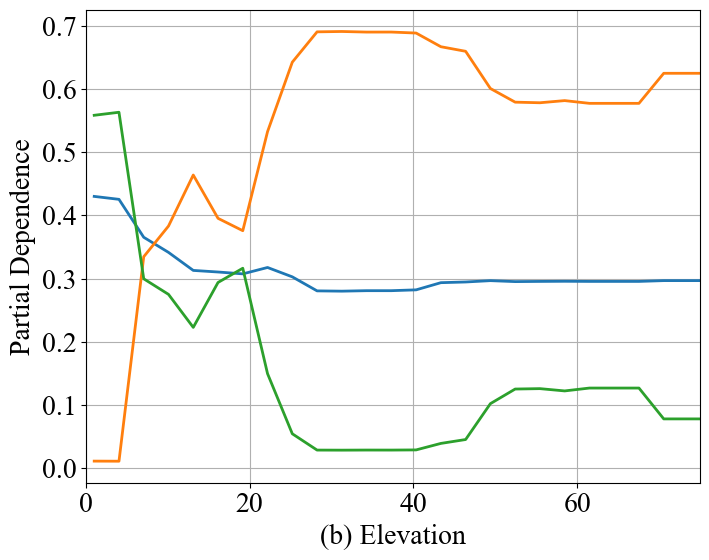

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.ticker as mtick

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'

# 1. 读取数据
df = pd.read_excel(r"C:\Users\la136\Desktop\2重投顺利\数据集\多分类训练.xlsx", sheet_name='三分类均衡')

# 2. 特征和标签
target_column = 'label'
X = df.drop(columns=[target_column])
y = df[target_column]

# 3. 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. 训练模型
num_classes = len(np.unique(y))
model = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)

# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# 5. 类别标签映射
class_labels = {0: 'High', 1: 'Medium', 2: 'Low'}

# 6. 提取 PDP 数据
pdp_results = {}

for class_id in range(num_classes):
    fig, ax = plt.subplots(figsize=(8, 6))

    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features=['Elevation'],
        target=class_id,
        kind="average",
        grid_resolution=100,
        ax=ax
    )

    line = display.lines_[0][0]
    x_vals = line.get_xdata()
    y_vals = line.get_ydata()
    pdp_results[class_id] = (x_vals, y_vals)

    plt.close(fig)

# 7. 统一绘图
plt.figure(figsize=(7.5, 6))
for class_id, (x, y) in pdp_results.items():
    label_name = class_labels.get(class_id, f"Class {class_id}")
    plt.plot(x, y, label=label_name, linewidth=2)

# 设置字体大小
plt.xlabel('(b) Elevation', fontsize=20)
plt.ylabel('Partial Dependence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=18)
plt.grid(True)
plt.xlim(0, 75)
plt.tight_layout()
plt.show()




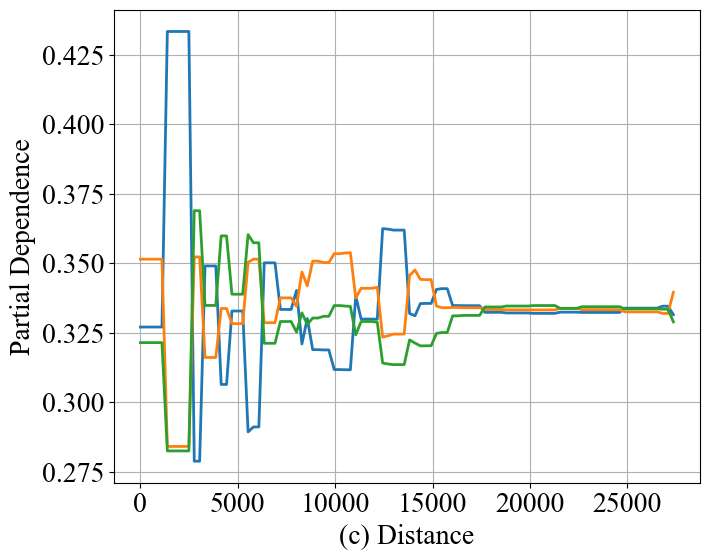

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.ticker as mtick

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'

# 1. 读取数据
df = pd.read_excel(r"C:\Users\la136\Desktop\2重投顺利\数据集\多分类训练.xlsx", sheet_name='三分类均衡')

# 2. 特征和标签
target_column = 'label'
X = df.drop(columns=[target_column])
y = df[target_column]

# 3. 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. 训练模型
num_classes = len(np.unique(y))
model = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)

# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# 5. 类别标签映射
class_labels = {0: 'High', 1: 'Medium', 2: 'Low'}

# 6. 提取 PDP 数据
pdp_results = {}

for class_id in range(num_classes):
    fig, ax = plt.subplots(figsize=(6, 4))

    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features=['Distance'],
        target=class_id,
        kind="average",
        grid_resolution=100,
        ax=ax
    )

    line = display.lines_[0][0]
    x_vals = line.get_xdata()
    y_vals = line.get_ydata()
    pdp_results[class_id] = (x_vals, y_vals)

    plt.close(fig)

# 7. 统一绘图
plt.figure(figsize=(7.5, 6))
for class_id, (x, y) in pdp_results.items():
    label_name = class_labels.get(class_id, f"Class {class_id}")
    plt.plot(x, y, label=label_name, linewidth=2)

# 设置字体大小
plt.xlabel('(c) Distance', fontsize=20)
plt.ylabel('Partial Dependence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=18)
plt.grid(True)
# plt.xlim(-5000,0)
plt.tight_layout()
plt.show()

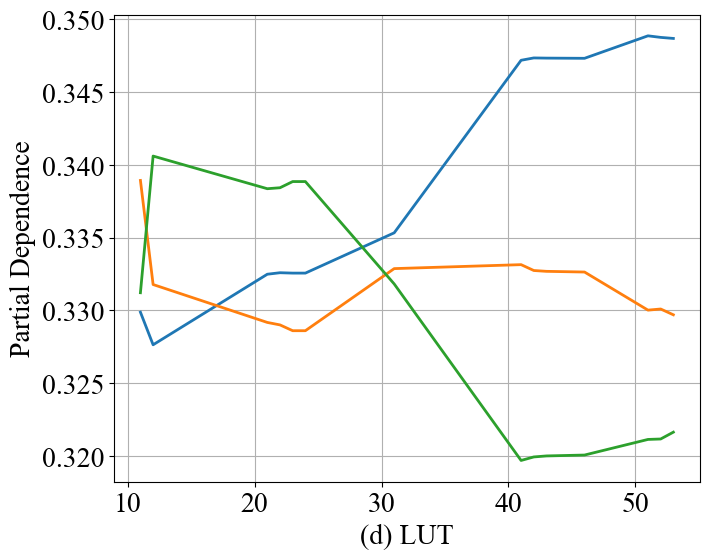

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.ticker as mtick

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'

# 1. 读取数据
df = pd.read_excel(r"C:\Users\la136\Desktop\2重投顺利\数据集\多分类训练.xlsx", sheet_name='三分类均衡')

# 2. 特征和标签
target_column = 'label'
X = df.drop(columns=[target_column])
y = df[target_column]

# 3. 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. 训练模型
num_classes = len(np.unique(y))
model = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)

# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# 5. 类别标签映射
class_labels = {0: 'High', 1: 'Medium', 2: 'Low'}

# 6. 提取 PDP 数据
pdp_results = {}

for class_id in range(num_classes):
    fig, ax = plt.subplots(figsize=(6, 4))

    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features=['LUT'],
        target=class_id,
        kind="average",
        grid_resolution=100,
        ax=ax
    )

    line = display.lines_[0][0]
    x_vals = line.get_xdata()
    y_vals = line.get_ydata()
    pdp_results[class_id] = (x_vals, y_vals)

    plt.close(fig)

# 7. 统一绘图
plt.figure(figsize=(7.5, 6))
for class_id, (x, y) in pdp_results.items():
    label_name = class_labels.get(class_id, f"Class {class_id}")
    plt.plot(x, y, label=label_name, linewidth=2)

# 设置字体大小
plt.xlabel('(d) LUT', fontsize=20)
plt.ylabel('Partial Dependence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=18)
plt.grid(True)
# plt.xlim(-5000,0)
plt.tight_layout()
plt.show()